# Instructions:
---

1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

### DATASET

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Data Cleaning

In [2]:
df = pd.read_excel("../Datasets/online-retail/Online Retail.xlsx")
df.dropna(inplace=True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Feature engineering

In [3]:
formatted_df = df
formatted_df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
formatted_df["TotalRevenue"] = df["Quantity"] * df["UnitPrice"]
formatted_df["StockCode"] = df["StockCode"].astype(str) 
if "InvoiceNo" in df.columns:
    df.drop(columns=["InvoiceNo"], inplace=True)
if "Country" in df.columns:
    df.drop(columns=["Country"], inplace=True)
if "Description" in df.columns:
    df.drop(columns=["Description"], inplace=True)

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(formatted_df[['StockCode', 'CustomerID']])
encoded_feature_names = encoder.get_feature_names_out(['StockCode', 'CustomerID'])

encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

encoded_df.head()

,StockCode_10080,StockCode_10120,StockCode_10123C,StockCode_10124A,StockCode_10124G,StockCode_10125,StockCode_10133,StockCode_10135,StockCode_11001,StockCode_15030,...,CustomerID_18273.0,CustomerID_18274.0,CustomerID_18276.0,CustomerID_18277.0,CustomerID_18278.0,CustomerID_18280.0,CustomerID_18281.0,CustomerID_18282.0,CustomerID_18283.0,CustomerID_18287.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploratory Data Analysis

Text(0, 0.5, 'Total Revenue')

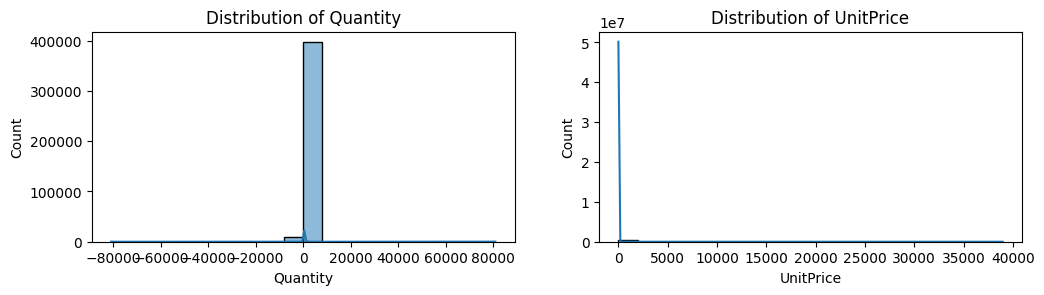

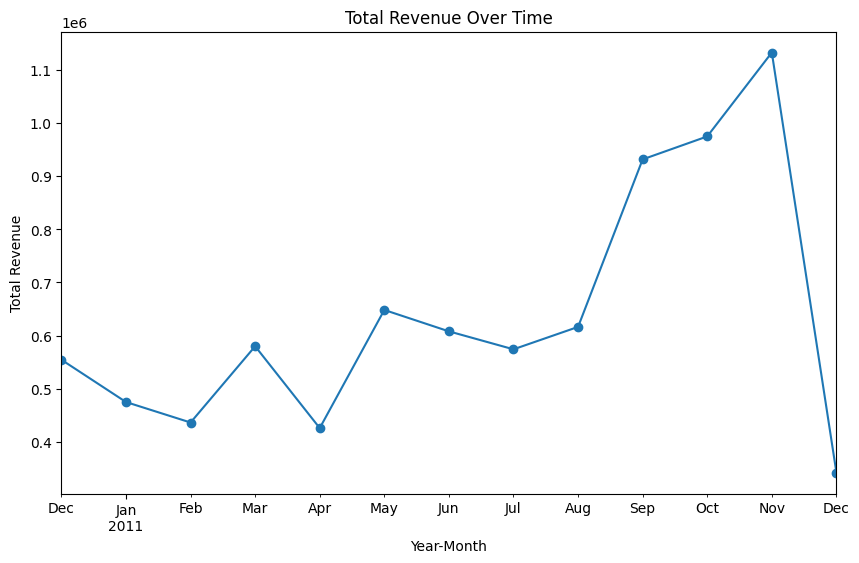

In [23]:
# Numerical Variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(formatted_df['Quantity'], bins=20, kde=True)
plt.title('Distribution of Quantity')

plt.subplot(2, 2, 2)
sns.histplot(formatted_df['UnitPrice'], bins=20, kde=True)
plt.title('Distribution of UnitPrice')

# Time-Series Analysis
formatted_df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
formatted_df['InvoiceYearMonth'] = formatted_df['InvoiceDate'].dt.to_period('M')
revenue_by_month = formatted_df.groupby('InvoiceYearMonth')['TotalRevenue'].sum()

plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='line', marker='o')
plt.title('Total Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')

### Dataset split

In [28]:
X = formatted_df.drop(["TotalRevenue", "InvoiceDate", "InvoiceYearMonth", "StockCode"], axis=1) 
y = formatted_df["TotalRevenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection & Training

In [29]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Model evaluation

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Coefficients:", model.coef_)

Mean Squared Error: 6875.812917906235
Root Mean Squared Error: 82.92052169340371
R-squared: -0.07707659363230257
Coefficients: [ 1.57711094e+00 -8.77346011e-01  1.16473663e-04]


### Plot predicted vs. actual values

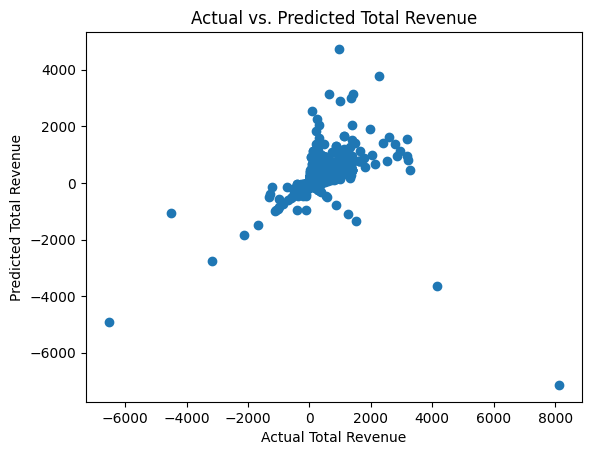

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Revenue")
plt.ylabel("Predicted Total Revenue")
plt.title("Actual vs. Predicted Total Revenue")
plt.show()
